In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np
from scipy.cluster.vq import kmeans

from sklearn.datasets import load_iris # импорт данных об Ирисах Фишера
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
points = np.array([[1,2], [2,1], [2,2], [1,3], [6,7], [6,5], [7,8], [8,8]],dtype=float)

centroids = kmeans(points, 2)

print(centroids)

(array([[6.75, 7.  ],
       [1.5 , 2.  ]]), 1.094203297448975)


In [3]:
import numpy as np
from scipy.spatial.distance import cdist


# Почему-то теперь элементы массива(точки) должны быть float или double...
points = np.array([[1,2], [2,1], [2,2], [1,3], [6,7], [6,5], [7,8], [8,8]], dtype=float)

# Список найденных центроидов и дисперсия
centroids, disp = kmeans(points, 1)

# Перебираем найденные центроиды, метод <kmeans> всегда возвратит двумерный массив
# оба параметра метода <cdist> должны быть двумерными массивами
results = ( sum(cdist(points, [centroid,])**2) for centroid in centroids )


print( list(results) )

[array([116.875])]


In [4]:
plt.figure(figsize=(6, 6))
plt.style.use('seaborn-white')

# грузим данные 
data = pd.read_csv("../resources/iris.csv")
data

# или 

# load_iris
# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Figure size 432x432 with 0 Axes>

Text(0, 0.5, 'Total_WCSS')

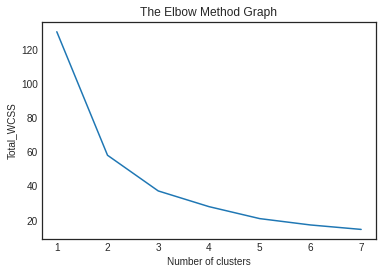

In [5]:
X = data[['sepal_length','sepal_width']].values

# определяем необходимое количество кластеров
total_wcss=[]
n_clusters = 8

for i in range(1,n_clusters): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters),total_wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Total_WCSS')

In [6]:
# Запишем координаты точек в виде массива numpy
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])
# Обучим модель KMeans на нашем массиве с одним кластером
kmeans = KMeans(n_clusters=1).fit(X)
# Выведем координаты центроида данного кластера
print(kmeans.cluster_centers_)
# Выведем сумму квадратов расстояний точек от центроида = аттрибут модели kmeans
print(kmeans.inertia_)

[[3. 5.]]
146.0


In [13]:
import numpy
from scipy.spatial.distance import cdist

def get_mean(points): #координаты центроида
    points = numpy.array(points)
    return sum(points)/ len(points)

def get_wss(points): #сумма квадратов расстояний точек до центроида 
    mean = get_mean(points)
    squares = cdist(points, [mean], 'sqeuclidean')
    return sum(squares)[0]

In [14]:
points= np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])
get_wss(points)

146.0

In [15]:
get_mean(points)

array([3., 5.])